In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import time

In [5]:
from google.colab import files
uploaded = files.upload()  # Upload train.csv manually here
import io
train_df = pd.read_csv(io.BytesIO(uploaded['train.csv']))


Saving train.csv to train.csv


In [8]:
# Show the first 5 rows of the dataset
print(train_df.head())

   id  MonsoonIntensity  TopographyDrainage  RiverManagement  Deforestation  \
0   0                 5                   8                5              8   
1   1                 6                   7                4              4   
2   2                 6                   5                6              7   
3   3                 3                   4                6              5   
4   4                 5                   3                2              6   

   Urbanization  ClimateChange  DamsQuality  Siltation  AgriculturalPractices  \
0             6              4            4          3                      3   
1             8              8            3          5                      4   
2             3              7            1          5                      4   
3             4              8            4          7                      6   
4             4              4            3          3                      3   

   ...  DrainageSystems  CoastalVulner

In [9]:
# Basic info about dataset
print(train_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1117957 entries, 0 to 1117956
Data columns (total 22 columns):
 #   Column                           Non-Null Count    Dtype  
---  ------                           --------------    -----  
 0   id                               1117957 non-null  int64  
 1   MonsoonIntensity                 1117957 non-null  int64  
 2   TopographyDrainage               1117957 non-null  int64  
 3   RiverManagement                  1117957 non-null  int64  
 4   Deforestation                    1117957 non-null  int64  
 5   Urbanization                     1117957 non-null  int64  
 6   ClimateChange                    1117957 non-null  int64  
 7   DamsQuality                      1117957 non-null  int64  
 8   Siltation                        1117957 non-null  int64  
 9   AgriculturalPractices            1117957 non-null  int64  
 10  Encroachments                    1117957 non-null  int64  
 11  IneffectiveDisasterPreparedness  1117957 non-null 

In [10]:
# Check for missing values
print(train_df.isnull().sum())

id                                 0
MonsoonIntensity                   0
TopographyDrainage                 0
RiverManagement                    0
Deforestation                      0
Urbanization                       0
ClimateChange                      0
DamsQuality                        0
Siltation                          0
AgriculturalPractices              0
Encroachments                      0
IneffectiveDisasterPreparedness    0
DrainageSystems                    0
CoastalVulnerability               0
Landslides                         0
Watersheds                         0
DeterioratingInfrastructure        0
PopulationScore                    0
WetlandLoss                        0
InadequatePlanning                 0
PoliticalFactors                   0
FloodProbability                   0
dtype: int64


In [13]:
# Visualize target distribution (assuming there is a 'flood' or 'target' column)
if 'target' in train_df.columns:
    sns.countplot(x='target', data=train_df)
    plt.title('Target Variable Distribution')
    plt.show()

# Preprocessing example: fill missing values (simple approach)
train_df.fillna(method='ffill', inplace=True)

/tmp/ipython-input-13-1318309357.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  train_df.fillna(method='ffill', inplace=True)


In [15]:
print(train_df.columns)

Index(['id', 'MonsoonIntensity', 'TopographyDrainage', 'RiverManagement',
       'Deforestation', 'Urbanization', 'ClimateChange', 'DamsQuality',
       'Siltation', 'AgriculturalPractices', 'Encroachments',
       'IneffectiveDisasterPreparedness', 'DrainageSystems',
       'CoastalVulnerability', 'Landslides', 'Watersheds',
       'DeterioratingInfrastructure', 'PopulationScore', 'WetlandLoss',
       'InadequatePlanning', 'PoliticalFactors', 'FloodProbability'],
      dtype='object')


In [16]:
X = train_df.drop(columns=['FloodProbability'])
y = train_df['FloodProbability']

In [17]:
from sklearn.model_selection import train_test_split

# Split dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f'Training samples: {X_train.shape[0]}')
print(f'Testing samples: {X_test.shape[0]}')

Training samples: 894365
Testing samples: 223592


In [19]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluate with regression metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')
print(f'R^2 Score: {r2:.4f}')


Mean Squared Error: 0.0009
R^2 Score: 0.6474


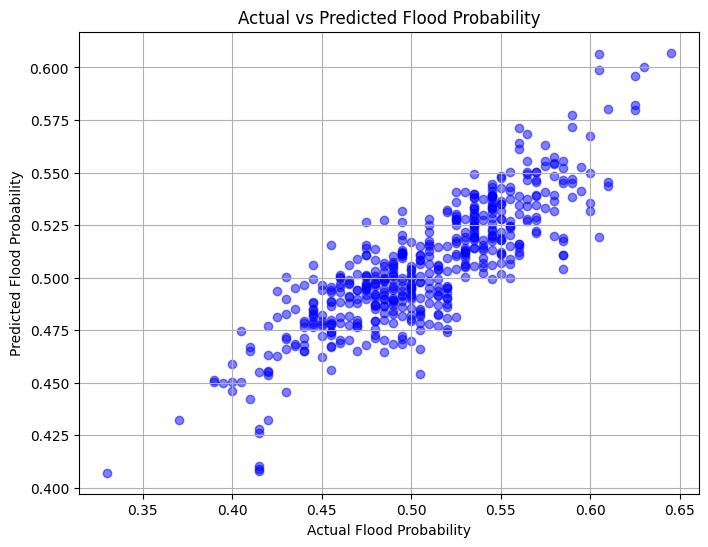

In [20]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(y_test[:500], y_pred[:500], alpha=0.5, color='blue')
plt.xlabel("Actual Flood Probability")
plt.ylabel("Predicted Flood Probability")
plt.title("Actual vs Predicted Flood Probability")
plt.grid(True)
plt.show()

In [21]:
import joblib
joblib.dump(rf_model, 'flood_model.pkl')  # saves the model

['flood_model.pkl']

In [23]:
# Generate a simple synthetic time series
np.random.seed(42)
time_steps = 1000

rainfall = np.random.normal(loc=50, scale=10, size=time_steps)
river_level = np.convolve(rainfall, np.ones(5)/5, mode='same') + np.random.normal(0, 2, time_steps)
flood_probability = 1 / (1 + np.exp(-(river_level - 50) / 5))  # Sigmoid based on river level

df = pd.DataFrame({
    'Rainfall': rainfall,
    'RiverLevel': river_level,
    'FloodProbability': flood_probability
})

In [24]:
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

# Use the first 2 features to predict the third
X_seq = scaled[:, :2]
y_seq = scaled[:, 2]

# Create sequences
seq_length = 10
generator = TimeseriesGenerator(X_seq, y_seq, length=seq_length, batch_size=32)


In [25]:
model = Sequential([
    LSTM(64, input_shape=(seq_length, 2)),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')

start = time.time()
model.fit(generator, epochs=10)
end = time.time()

print(f"Training time: {end - start:.2f} seconds")

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


31/31 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.1606
Epoch 2/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0424
Epoch 3/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0399
Epoch 4/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0387
Epoch 5/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0360
Epoch 6/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0353
Epoch 7/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0379
Epoch 8/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0313
Epoch 9/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0340
Epoch 10/10
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0331
Training time: 4.46 seconds


31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


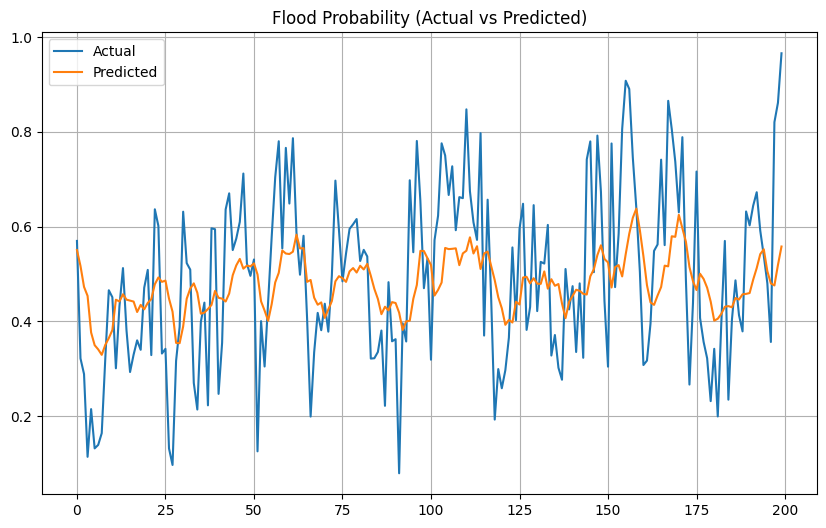

In [26]:
y_pred = model.predict(generator)
y_true = y_seq[seq_length:]

# Inverse transform to compare
flood_true = scaler.inverse_transform(np.hstack((X_seq[seq_length:], y_true.reshape(-1,1))))[:, 2]
flood_pred = scaler.inverse_transform(np.hstack((X_seq[seq_length:], y_pred)))[:, 2]

plt.figure(figsize=(10, 6))
plt.plot(flood_true[:200], label='Actual')
plt.plot(flood_pred[:200], label='Predicted')
plt.title('Flood Probability (Actual vs Predicted)')
plt.legend()
plt.grid(True)
plt.show()